In [ ]:
! pip install torch accelerate imblearn transformers nltk pandas numpy matplotlib seaborn wordcloud tk

In [2]:
import os

csv= 'WELFake_Dataset.csv'

if os.path.exists(csv):
    os.remove(csv)
    print(f"{csv} has been deleted.")
else:
    print(f"{csv} does not exist.")


    
! unzip WELFake_Dataset.csv.zip


WELFake_Dataset.csv does not exist.
Archive:  WELFake_Dataset.csv.zip
  inflating: WELFake_Dataset.csv     


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bushraabdullahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd

df = pd.read_csv("WELFake_Dataset.csv")

df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df["label"].value_counts()
# 1 = reliable
# 0 = unreliable

label
1    36509
0    35028
Name: count, dtype: int64

In [8]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# Apply random undersampling
rus = RandomUnderSampler()
X_balanced, y_balanced = rus.fit_resample(X, y)

y_balanced.value_counts()



label
0    35028
1    35028
Name: count, dtype: int64

In [9]:
import pandas as pd

# Reconstruct balanced DataFrame with original column names
X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)

# Combine balanced features with balanced labels
balanced_df = pd.concat([X_balanced_df, y_balanced], axis=1)

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define a function to remove stop words and lemmatize text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    return preprocessed_text

# Create a new DataFrame with the same structure as the original one
preprocessed_df = balanced_df.copy()

# Preprocess the "text" column
preprocessed_df["text"] = preprocessed_df["text"].apply(preprocess_text)

# Preprocess the "title" column
preprocessed_df["title"] = preprocessed_df["title"].apply(preprocess_text)


In [11]:
preprocessed_df.head()

,Unnamed: 0,title,text,label
3,3,"Bobby Jindal , raised Hindu , us story Christi...",dozen politically active pastor came private d...,0
11,11,"May Brexit offer would hurt , cost EU citizen ...",BRUSSELS ( Reuters ) - British Prime Minister ...,0
12,12,Schumer call Trump appoint official oversee Pu...,"WASHINGTON ( Reuters ) - Charles Schumer , top...",0
14,14,Change Expected ESPN Political Agenda Despite ...,sport fan turn ESPN protest network ’ social p...,0
15,15,Billionaire Odebrecht Brazil scandal released ...,RIO DE JANEIRO/SAO PAULO ( Reuters ) - Billion...,0


In [12]:
file_path = "preprocessed_data_3.csv"

import os

# Check if the file exists before attempting to delete it
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")




preprocessed_data_3.csv does not exist.


In [13]:
preprocessed_df.to_csv(file_path, index=False)

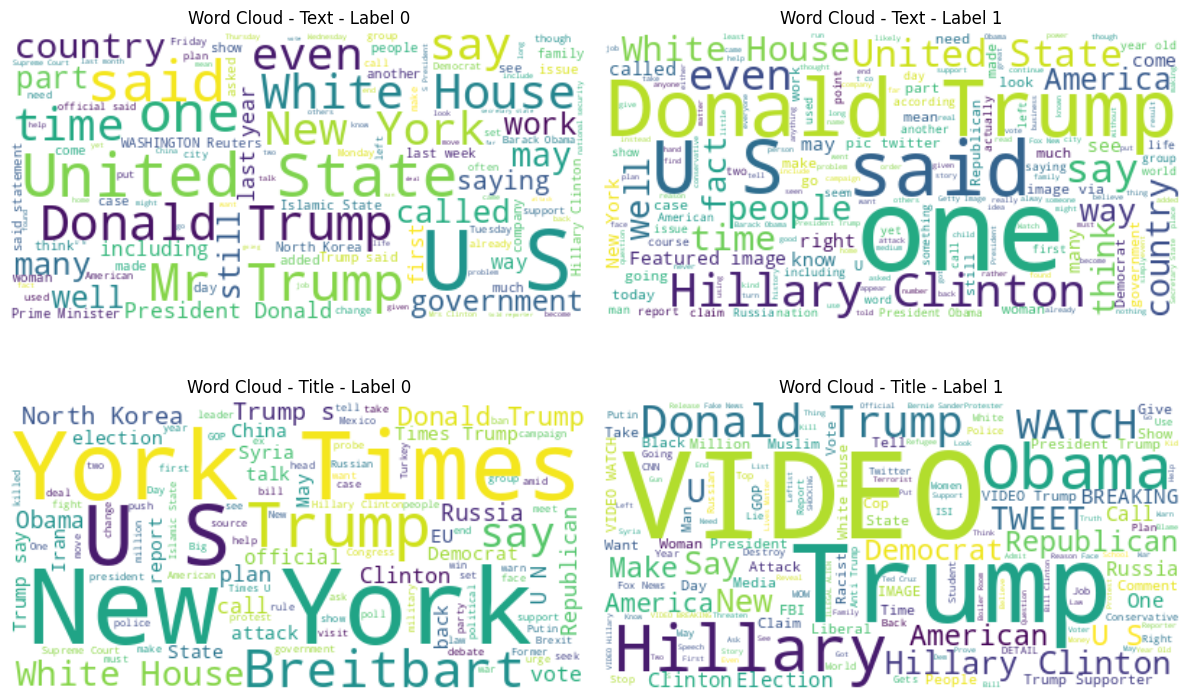

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a given column
def generate_word_cloud(column_name, label, subplot_position):
    text_string = " ".join(preprocessed_df[preprocessed_df["label"] == label][column_name])
    wordcloud = WordCloud(width=400, height=200, background_color="white").generate(text_string)
    ax[subplot_position[0], subplot_position[1]].imshow(wordcloud, interpolation="bilinear")
    ax[subplot_position[0], subplot_position[1]].axis("off")
    ax[subplot_position[0], subplot_position[1]].set_title(f"Word Cloud - {column_name.capitalize()} - Label {label}")

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Generate word clouds for the "text" column
generate_word_cloud("text", 0, (0, 0))
generate_word_cloud("text", 1, (0, 1))

# Generate word clouds for the "title" column
generate_word_cloud("title", 0, (1, 0))
generate_word_cloud("title", 1, (1, 1))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
